In [32]:
import matplotlib.pyplot as plt
import rasterio
import os
import numpy as np
from merge_sentinel import get_images_order_by_gps_location


def show_img(p, band=10, is_log=False):
    with rasterio.open(p) as src:
        image_data = src.read(band)

    if is_log:
        magnitude = np.abs(image_data)
        magnitude_log = np.log2(magnitude + 1)

        plt.imshow(magnitude_log, vmin=np.percentile(magnitude_log, 1), vmax=np.percentile(magnitude_log, 99)) #cmap='gray', 
    else:
        plt.imshow(image_data)

In [33]:
import os
import glob
def get_recent_images(folder, num_images=10):
    # Get a list of all image files in the folder and its subfolders
    image_extensions = ('*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp', '*.tiff')
    image_files = []
    for ext in image_extensions:
        image_files.extend(glob.glob(os.path.join(folder, '**', ext), recursive=True))

    # Get the creation time for each image
    image_files_with_creation_time = []
    for image in image_files:
        creation_time = os.path.getctime(image)
        image_files_with_creation_time.append((image, creation_time))

    # Sort the images by creation time in descending order
    image_files_with_creation_time.sort(key=lambda x: x[1], reverse=True)

    # Return the specified number of images
    return [x[0] for x in image_files_with_creation_time[:num_images]]

In [34]:
def show_13_bands(p):
    with rasterio.open(p) as src:
        image_data = src.read()

    fig, axs = plt.subplots(3, 5, figsize=(15, 15))
    for i in range(13):
        axs[i//5, i%5].imshow(image_data[i])
        axs[i//5, i%5].set_xticks([])
        axs[i//5, i%5].set_yticks([])    

In [35]:
def show_original_and_projected(original, projected, band = 0):
    with rasterio.open(original) as src:
        o = src.read()
    with rasterio.open(projected) as src:
        p = src.read()

    # shows image[band] from original and projected
    fig, axs = plt.subplots(1, 2, figsize=(15, 15))
    axs[0].imshow(o[band])
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[1].imshow(p[band])
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    

In [36]:
def show_images(images_list, band = 10):
    fig, axs = plt.subplots(1, len(images_list), figsize=(15, 15))
    for i, p in enumerate(images_list):
        with rasterio.open(p) as src:
            image_data = src.read()
        axs[i].imshow(image_data[band])
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        if src.bounds.left > 100000:
            axs[i].set_xlabel(f'{src.bounds.left/100000:.2f}, {src.bounds.top/100000:.2f}')
        else:
            axs[i].set_xlabel(f'{src.bounds.left:.2f}, {src.bounds.top:.2f}')

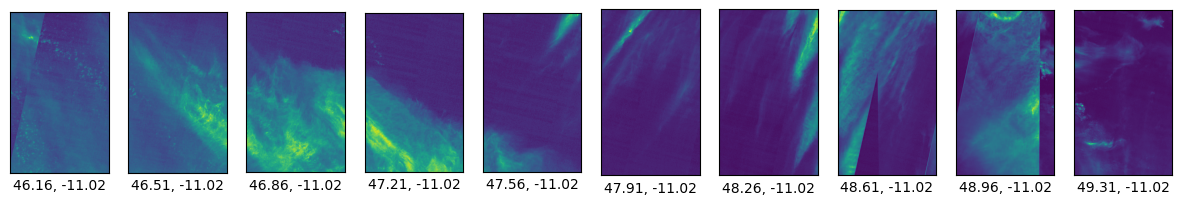

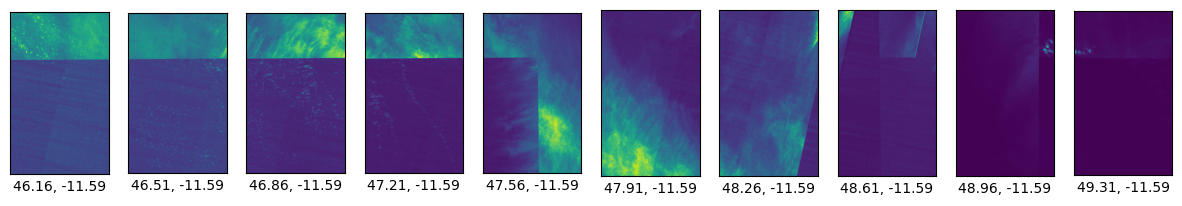

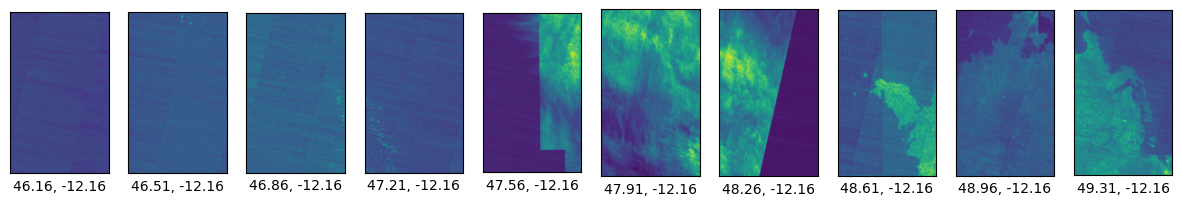

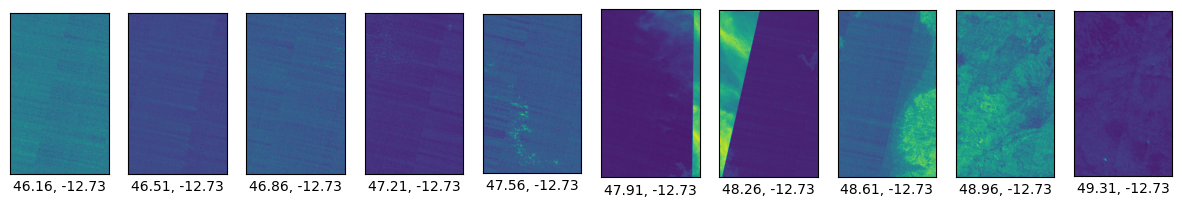

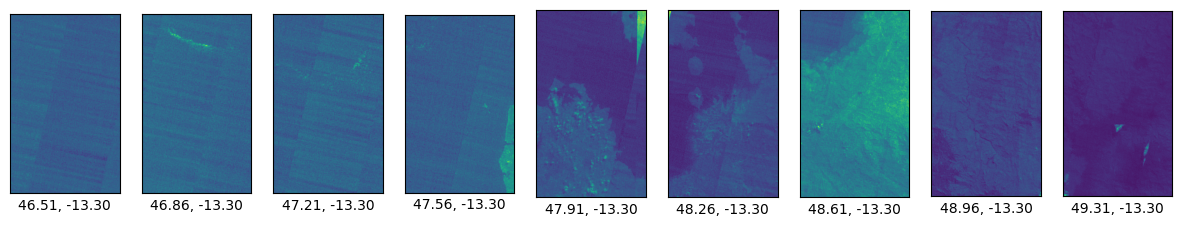

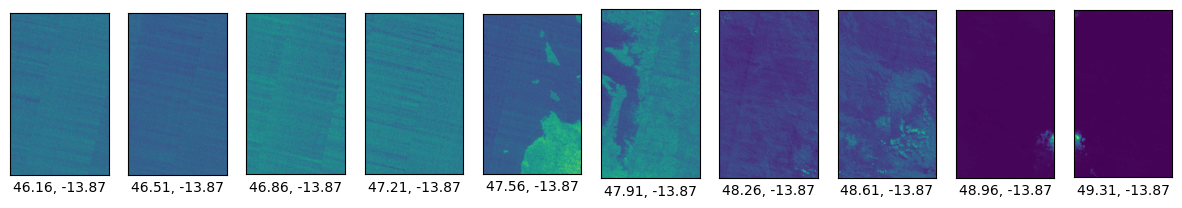

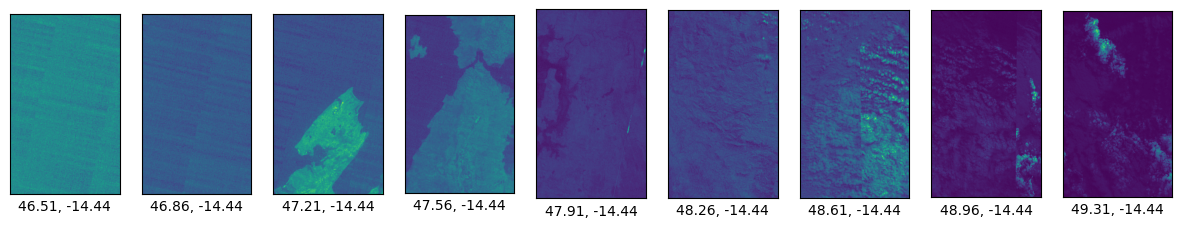

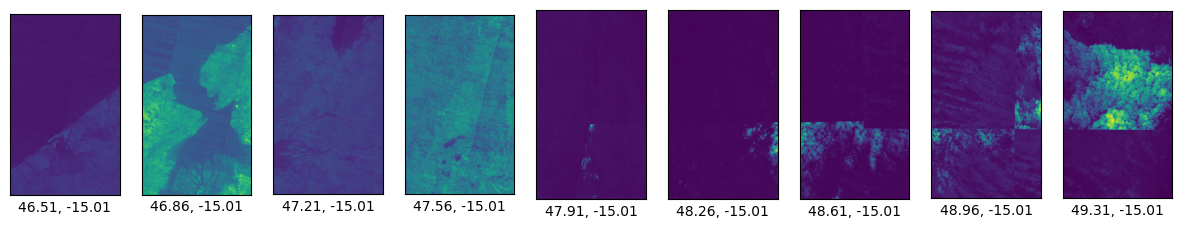

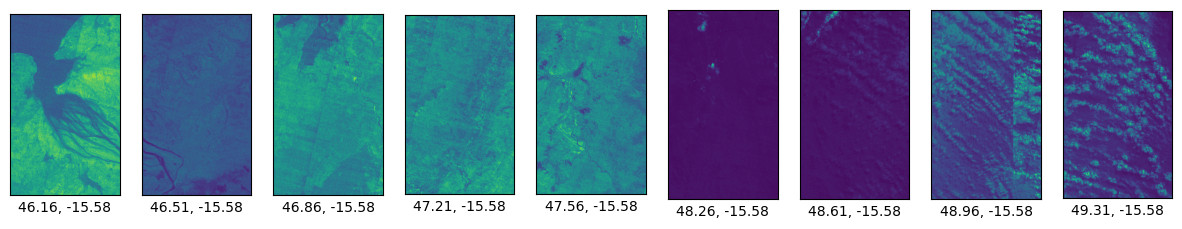

In [14]:
o_dir = '/home/ming/BP/sentinel/sentinel_downloaded/001'
p_dir = '/home/ming/BP/sentinel/sentinel_preprocessed/001/'
m_dir = '/home/ming/BP/sentinel/sentinel_preprocessed/001/EPSG3857'

#retrieve 10 tiff images from the dir order by creation time
o_imgs = get_images_order_by_gps_location(o_dir, num_images=90)
show_images(o_imgs[76:86])
show_images(o_imgs[66:76])
show_images(o_imgs[56:66])
show_images(o_imgs[46:56])
show_images(o_imgs[37:46])
show_images(o_imgs[27:37])
show_images(o_imgs[18:27])
show_images(o_imgs[9:18])
show_images(o_imgs[0:9])


# p_imgs = get_images_order_by_gps_location(m_dir, num_images=9)
# show_images(p_imgs[:8])




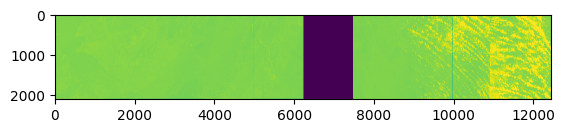

In [41]:
# p_imgs = get_images_order_by_gps_location(m_dir, num_images=8)
# show_images(p_imgs[:8])


stitched = '/home/ming/BP/sentinel/sentinel_preprocessed/001/EPSG3857/stitched.tif'
show_img(stitched, band=1, is_log=True)


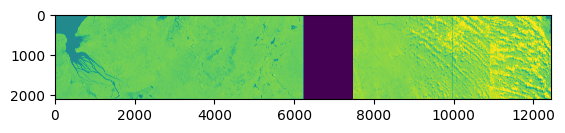

In [43]:
show_img(stitched, band=10, is_log=True)

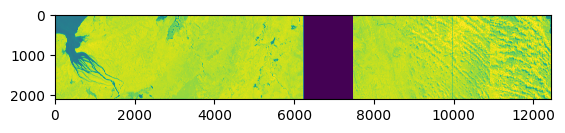

In [42]:
show_img(stitched, band=12, is_log=True)


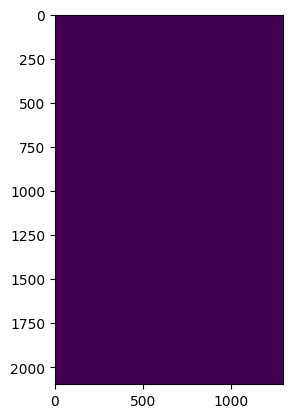

In [46]:
file = '/home/ming/BP/sentinel/downloaded_data/9822752a453867dce1841af1ecf7e13c/response.tiff'
show_img(file, band=12, is_log=True)